In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
go_df = pd.read_csv("goemotions_1.csv")

In [3]:
go_df.head()


,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
go_df.shape


(70000, 37)

In [5]:
go_df.columns


Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [6]:
print("Number of rows:", go_df.shape[0])
print("Number of columns:", go_df.shape[1])


Number of rows: 70000
Number of columns: 37


In [7]:
go_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confusion          

In [8]:
field_description = pd.DataFrame({
    "Column name": ["text", "labels"],
    "Description": [
        "The Reddit comment text",
        "Emotion labels associated with the text (multi-label)"
    ]
})

field_description

,Column name,Description
0,text,The Reddit comment text
1,labels,Emotion labels associated with the text (multi...


In [10]:
go_df.columns


Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [11]:
metadata_cols = [
    "text", "id", "author", "subreddit", "link_id", "parent_id",
    "created_utc", "rater_id", "example_very_unclear"
]

emotion_cols = [c for c in go_df.columns if c not in metadata_cols]

len(emotion_cols), emotion_cols


(28,
 ['admiration',
  'amusement',
  'anger',
  'annoyance',
  'approval',
  'caring',
  'confusion',
  'curiosity',
  'desire',
  'disappointment',
  'disapproval',
  'disgust',
  'embarrassment',
  'excitement',
  'fear',
  'gratitude',
  'grief',
  'joy',
  'love',
  'nervousness',
  'optimism',
  'pride',
  'realization',
  'relief',
  'remorse',
  'sadness',
  'surprise',
  'neutral'])

In [12]:
print("Number of rows:", go_df.shape[0])
print("Number of columns:", go_df.shape[1])
print("Number of emotion classes:", len(emotion_cols))


Number of rows: 70000
Number of columns: 37
Number of emotion classes: 28


In [13]:
go_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text                  70000 non-null  object 
 1   id                    70000 non-null  object 
 2   author                70000 non-null  object 
 3   subreddit             70000 non-null  object 
 4   link_id               70000 non-null  object 
 5   parent_id             70000 non-null  object 
 6   created_utc           70000 non-null  float64
 7   rater_id              70000 non-null  int64  
 8   example_very_unclear  70000 non-null  bool   
 9   admiration            70000 non-null  int64  
 10  amusement             70000 non-null  int64  
 11  anger                 70000 non-null  int64  
 12  annoyance             70000 non-null  int64  
 13  approval              70000 non-null  int64  
 14  caring                70000 non-null  int64  
 15  confusion          

In [14]:
field_description = pd.DataFrame({
    "Column name": ["text", "emotion labels"],
    "Description": [
        "Reddit comment text",
        "Binary emotion annotations (multi-label, 28 emotions)"
    ]
})

field_description


,Column name,Description
0,text,Reddit comment text
1,emotion labels,"Binary emotion annotations (multi-label, 28 em..."


In [15]:
label_counts = go_df[emotion_cols].sum().sort_values(ascending=False)
label_counts


neutral           18423
approval           5928
admiration         5647
annoyance          4443
gratitude          3863
disapproval        3774
curiosity          3267
amusement          3081
optimism           2887
realization        2867
disappointment     2771
love               2745
joy                2607
anger              2589
confusion          2471
sadness            2193
caring             1988
excitement         1900
surprise           1806
disgust            1704
desire             1248
fear               1048
remorse             849
embarrassment       817
nervousness         598
pride               452
relief              452
grief               227
dtype: int64

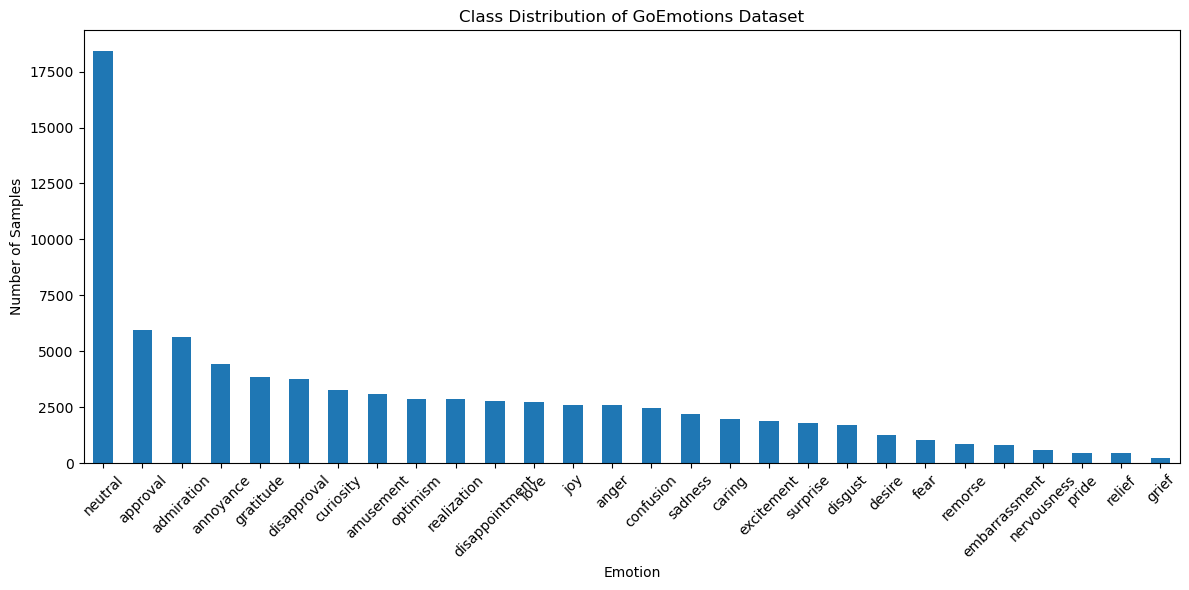

In [16]:
plt.figure(figsize=(12, 6))
label_counts.plot(kind="bar")
plt.title("Class Distribution of GoEmotions Dataset")
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
go_df["num_labels"] = go_df[emotion_cols].sum(axis=1)
go_df["num_labels"].describe()


count    70000.000000
mean         1.180643
std          0.497322
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: num_labels, dtype: float64

In [18]:
go_df["num_labels"].value_counts().sort_index()


num_labels
0     1129
1    56984
2    10291
3     1404
4      137
5       29
6       14
7        8
8        2
9        2
Name: count, dtype: int64

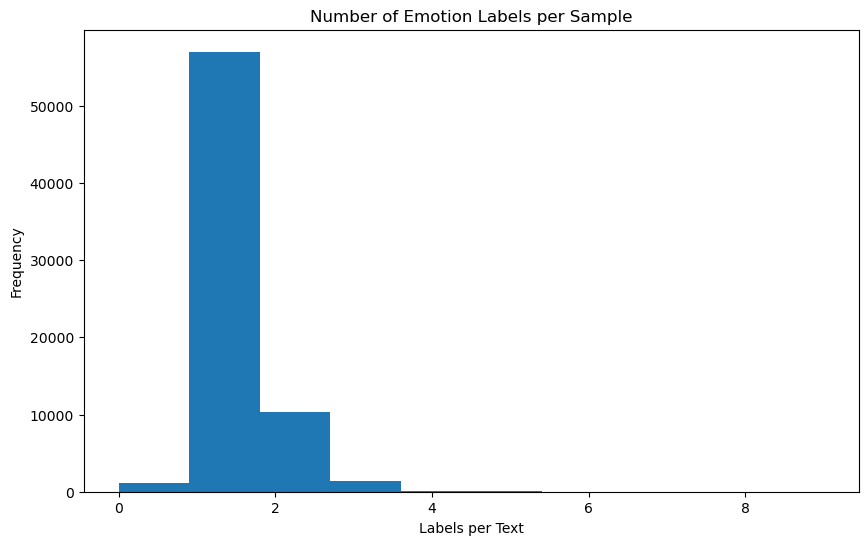

In [19]:
plt.hist(go_df["num_labels"], bins=10)
plt.title("Number of Emotion Labels per Sample")
plt.xlabel("Labels per Text")
plt.ylabel("Frequency")
plt.show()


In [20]:
go_df["text_length"] = go_df["text"].astype(str).apply(len)
go_df["text_length"].describe()


count    70000.000000
mean        69.420757
std         36.589788
min          3.000000
25%         39.000000
50%         67.000000
75%         97.000000
max        703.000000
Name: text_length, dtype: float64

In [21]:
avg_length_by_emotion = {}

for emotion in emotion_cols:
    avg_length_by_emotion[emotion] = (
        go_df.loc[go_df[emotion] == 1, "text_length"].mean()
    )

pd.Series(avg_length_by_emotion).sort_values(ascending=False)


realization       81.782700
optimism          79.174229
disappointment    78.869361
nervousness       78.481605
disapproval       78.094065
embarrassment     77.981640
fear              76.259542
annoyance         76.222147
desire            76.064103
confusion         75.741400
caring            75.151911
disgust           74.729460
remorse           74.672556
approval          73.702935
relief            72.371681
sadness           72.267670
curiosity         72.038874
grief             71.440529
pride             69.088496
surprise          68.742525
neutral           68.045324
anger             67.696794
joy               67.169927
admiration        66.412077
amusement         66.258033
love              65.181785
excitement        63.045263
gratitude         62.664768
dtype: float64

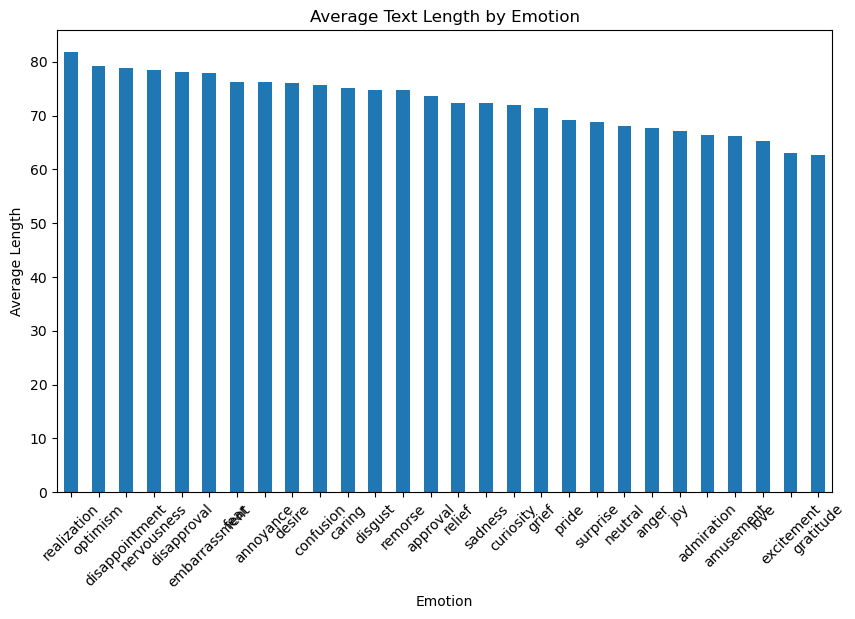

In [22]:
pd.Series(avg_length_by_emotion).sort_values(ascending=False).plot(kind="bar")
plt.title("Average Text Length by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Average Length")
plt.xticks(rotation=45)
plt.show()


In [23]:
go_df.isnull().sum()


text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
num_labels              0
text_length 

In [24]:
go_df["example_very_unclear"].value_counts()


example_very_unclear
False    68871
True      1129
Name: count, dtype: int64

In [25]:
label_counts.head(5)


neutral       18423
approval       5928
admiration     5647
annoyance      4443
gratitude      3863
dtype: int64

In [26]:
label_counts.tail(5)


embarrassment    817
nervousness      598
pride            452
relief           452
grief            227
dtype: int64